In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings
filterwarnings("ignore")


In [21]:
#read datasets
df_inf=pd.read_csv("PCOS_infertility.csv", encoding='iso-8859-1')
df_noinf=pd.read_csv("data without infertility _final.csv", encoding='iso-8859-1')
print(f"Shape of df_inf:{df_inf.shape}")
print(f"Shape of df_noinf:{df_noinf.shape}")

Shape of df_inf:(541, 6)
Shape of df_noinf:(541, 43)


In [22]:
#Sample data from df_inf
df_inf.sample(5)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
154,155,10155,0,60.80,23.50,7.02
487,488,10488,0,1.97,1.99,10.32
79,80,10080,0,10.00,1.99,1.03
382,383,10383,0,10.84,10.84,18.9
89,90,10090,0,1.99,1.99,8.98


In [23]:
#Sample data from df_noinf
df_noinf.sample(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
107,108,10108,1,27,54.0,156.0,22.189349,13,72,18,...,1.0,0,110,80,11,10,16.0,14.0,7.0,NaN
394,395,10395,0,28,42.0,163.0,15.800000,13,70,18,...,1.0,0,120,70,8,7,16.0,15.0,11.0,NaN
379,380,10380,0,31,55.5,151.0,24.300000,15,74,18,...,1.0,0,110,80,6,7,18.0,22.0,9.0,NaN
340,341,10341,1,26,60.0,152.0,26.000000,13,78,22,...,1.0,0,100,80,10,15,14.0,11.0,10.0,NaN
212,213,10213,0,27,52.0,150.0,23.111111,11,82,20,...,0.0,1,120,80,1,1,17.0,16.0,9.4,NaN


## Feature Selection

In [24]:
#Identifying Features which have more than 0.40 correlation with PCOS(Y/N)

corr_features=df_noinf.corrwith(df_noinf["PCOS (Y/N)"]).abs().sort_values(ascending=False)
#features with correlation more than 0.4
corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [25]:
df_noinf['Cycle(R/I)'].unique()

array([2, 4, 5])

In [26]:
df_inf.corrwith(df_inf["PCOS (Y/N)"]).abs()

Sl. No                    0.060998
Patient File No.          0.060998
PCOS (Y/N)                1.000000
  I   beta-HCG(mIU/mL)    0.027617
II    beta-HCG(mIU/mL)    0.012757
dtype: float64

In [27]:
df_noinf=df_noinf[corr_features]
df_noinf.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0,3,3,0,0,0,2
1,0,5,3,0,0,0,2
2,1,15,13,0,0,0,2
3,0,2,2,0,0,0,2
4,0,4,3,0,0,0,2


In [28]:
df_noinf.columns

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

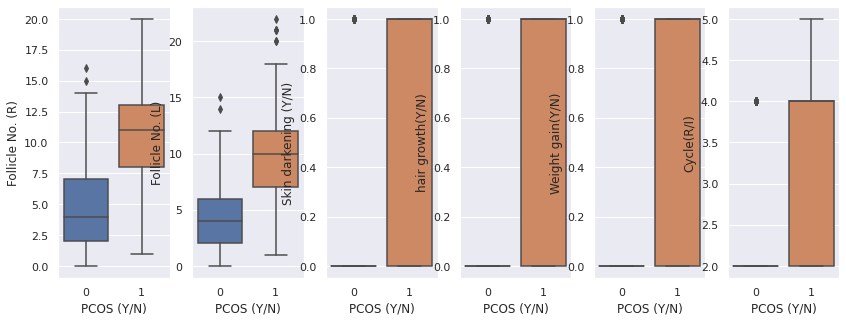

In [29]:
plt.figure(figsize=(14,5))
plt.subplot(1,6,1)
sns.boxplot(x='PCOS (Y/N)',y='Follicle No. (R)',data=df_noinf)
#plt.subplot(1,7,2)
#sns.boxplot(x='PCOS (Y/N)',y='Insulin levels (æIU/ml)',data=df_noinf)
plt.subplot(1,6,2)
sns.boxplot(x='PCOS (Y/N)',y='Follicle No. (L)',data=df_noinf)
plt.subplot(1,6,3)
sns.boxplot(x='PCOS (Y/N)',y='Skin darkening (Y/N)',data=df_noinf)
plt.subplot(1,6,4)
sns.boxplot(x='PCOS (Y/N)',y='hair growth(Y/N)',data=df_noinf)
plt.subplot(1,6,5)
sns.boxplot(x='PCOS (Y/N)',y='Weight gain(Y/N)',data=df_noinf)
plt.subplot(1,6,6)
sns.boxplot(x='PCOS (Y/N)',y='Cycle(R/I)',data=df_noinf)

plt.show()

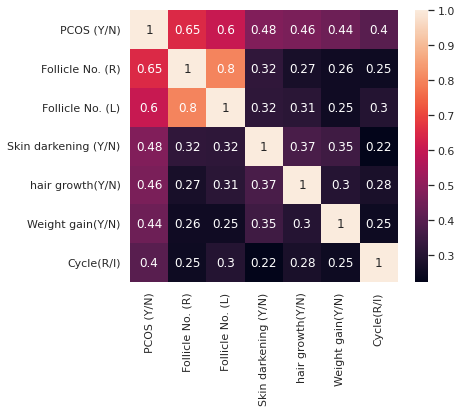

In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(df_noinf.corr(), annot=True)
plt.show()

In [31]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

In [32]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

## Training Model

In [33]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(f"Score in Train Data : {model.score(X_train,y_train)}")

Score in Train Data : 0.9050925925925926


In [34]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
print(f"Score in Train Data: {model2.score(X_train,y_train)}")

Score in Train Data: 0.9861111111111112


In [35]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
print(f'Score in train data: {model3.score(X_train, y_train)}')

Score in train data: 0.9861111111111112


## Prediction

In [36]:
y_pred=model.predict(X_test)

## Model Evaluation

In [37]:
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Score in Test Data : 0.926605504587156
Right classification : 101
Wrong classification : 8


array([[73,  2],
       [ 6, 28]])

In [38]:
import joblib

In [40]:
joblib.dump(model3, 'Decision_Tree.joblib')

['Decision_Tree.joblib']